### Quistion 3

#### 3.1  Run the example

In [1]:
# -*- coding: utf-8 -*-
"""
Simple example using LSTM recurrent neural network to classify IMDB
sentiment dataset.
References:
    - Long Short Term Memory, Sepp Hochreiter & Jurgen Schmidhuber, Neural
    Computation 9(8): 1735-1780, 1997.
    - Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng,
    and Christopher Potts. (2011). Learning Word Vectors for Sentiment
    Analysis. The 49th Annual Meeting of the Association for Computational
    Linguistics (ACL 2011).
Links:
    - http://deeplearning.cs.cmu.edu/pdfs/Hochreiter97_lstm.pdf
    - http://ai.stanford.edu/~amaas/data/sentiment/
"""
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# IMDB Dataset loading
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000,
                                valid_portion=0.1)
trainX, trainY = train
testX, testY = test

# Data preprocessing
# Sequence padding
trainX = pad_sequences(trainX, maxlen=100, value=0.)
testX = pad_sequences(testX, maxlen=100, value=0.)
# Converting labels to binary vectors
trainY = to_categorical(trainY, nb_classes=2)
testY = to_categorical(testY, nb_classes=2)

# Network building
net = tflearn.input_data([None, 100])
net = tflearn.embedding(net, input_dim=10000, output_dim=128)
net = tflearn.lstm(net, 128, dropout=0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
                         loss='categorical_crossentropy')

# Training
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=(testX, testY), show_metric=True,
batch_size=32)

Training Step: 7039  | total loss: 0.02715 | time: 173.274s
| Adam | epoch: 010 | loss: 0.02715 - acc: 0.9931 -- iter: 22496/22500
Training Step: 7040  | total loss: 0.02486 | time: 179.266s
| Adam | epoch: 010 | loss: 0.02486 - acc: 0.9938 | val_loss: 1.02542 - val_acc: 0.8032 -- iter: 22500/22500
--


#### 3.2 MLP Baseline

this is for reutores .. so we need to adapr keras to imdb so in the second one i did this..

In [3]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer

max_words = 1000
batch_size = 32
nb_epoch = 5

print('Loading data...')
(X_train, y_train), (X_test, y_test) = reuters.load_data(nb_words=max_words, test_split=0.2)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

nb_classes = np.max(y_train) + 1
print(nb_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(nb_words=max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    nb_epoch=nb_epoch, batch_size=batch_size,
                    verbose=1, validation_split=0.1)
score = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


Loading data...
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
X_train shape: (8982, 1000)
X_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
Y_train shape: (8982, 46)
Y_test shape: (2246, 46)
Building model...
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 9s - loss: 1.4178 - acc: 0.6799 - val_loss: 1.0621 - val_acc: 0.7653

using IMDB database

In [4]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

max_words = 1000
batch_size = 32
nb_epoch = 5

print('Loading data...')
(X_train, y_train), (X_test, y_test), _ = imdb.load_data(path='imdb.pkl', n_words=max_words,valid_portion=0.2)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

nb_classes = np.max(y_train) + 1
print(nb_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(nb_words=max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    nb_epoch=nb_epoch, batch_size=batch_size,
                    verbose=1, validation_split=0.1)
score = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])



Loading data...
20000 train sequences
5000 test sequences
2 classes
Vectorizing sequence data...
X_train shape: (20000, 1000)
X_test shape: (5000, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
Y_train shape: (20000, 2)
Y_test shape: (5000, 2)
Building model...
Train on 18000 samples, validate on 2000 samples
Epoch 1/5
18000/18000 [==============================] - 10s - loss: 0.4029 - acc: 0.8152 - val_loss: 0.3951 - val_acc: 0.8505

 Comparing the results we obtain with those of the LSTM model and by the above result with keras:
 
The algorthim get as input a vector:
exmaple: [0,0,0,10,12]
In this vector we can see the sentence have the word 10 and the word 12, Learning algorthims works with vectors like this:
[0,0,1,0,1,0,1] every cell in this vector represents a word in the sentence
and in this vector the sentence have the word 2 and 4 and 6 .(we can also use not a binary vector and cell number can have the count of the occurence of the word in the sentence)
Explantion Why we got in the LSTM Test accuracy higher than Multi layer:
In the LSTM the vector get Treatment by the embedding ,  but In the keras the vector stat as it is, so We think think this is the reason for higher accuracy in LSTM than the Multi-Layer.

LSTM:
It’s easier to think about LSTM as a function that maps a pair of vectors (state, input) to a pair of vectors (state, output), and those vectors generally have the same dimensionality. What actually happens inside depends on the parameters learned by the cell.

MLP Baseline:
When we have several cells stacked like The MLP Baseline, it’s the same thing as a sequential application of several functions of the same type but with different parameters.  The purpose of using multilayer RNN cells is to learn more sophisticated conditional distributions.



### 3.3 Reuters Classification in TFLearn

3.3.1) Write a function encode_doc(string) which given a document returns a vector that encodes this document using the Reuters word index. (Use the NLTK tokenizer). Use the inverse function decode_doc(ids) which given a list of word IDs returns the list of words that appear in the document. 

In [5]:
# -*- coding: utf-8 -*-
from __future__ import absolute_import
from keras.utils.data_utils import get_file
from six.moves import cPickle
from six.moves import zip
import numpy as np
import sys


def load_data(path='reuters.pkl', nb_words=None, skip_top=0,
              maxlen=None, test_split=0.2, seed=113,
              start_char=1, oov_char=2, index_from=3):
    '''Loads the Reuters newswire classification dataset.

    # Arguments
        path: where to store the data (in `/.keras/dataset`)
        nb_words: max number of words to include. Words are ranked
            by how often they occur (in the training set) and only
            the most frequent words are kept
        skip_top: skip the top N most frequently occuring words
            (which may not be informative).
        maxlen: truncate sequences after this length.
        test_split: Fraction of the dataset to be used as test data.
        seed: random seed for sample shuffling.
        start_char: The start of a sequence will be marked with this character.
            Set to 1 because 0 is usually the padding character.
        oov_char: words that were cut out because of the `nb_words`
            or `skip_top` limit will be replaced with this character.
        index_from: index actual words with this index and higher.

    Note that the 'out of vocabulary' character is only used for
    words that were present in the training set but are not included
    because they're not making the `nb_words` cut here.
    Words that were not seen in the trining set but are in the test set
    have simply been skipped.
    '''

    path = get_file(path, origin='https://s3.amazonaws.com/text-datasets/reuters.pkl')
    f = open(path, 'rb')
    X, labels = cPickle.load(f)
    f.close()

    np.random.seed(seed)
    np.random.shuffle(X)
    np.random.seed(seed)
    np.random.shuffle(labels)

    if start_char is not None:
        X = [[start_char] + [w + index_from for w in x] for x in X]
    elif index_from:
        X = [[w + index_from for w in x] for x in X]

    if maxlen:
        new_X = []
        new_labels = []
        for x, y in zip(X, labels):
            if len(x) < maxlen:
                new_X.append(x)
                new_labels.append(y)
        X = new_X
        labels = new_labels

    if not nb_words:
        nb_words = max([max(x) for x in X])

    # by convention, use 2 as OOV word
    # reserve 'index_from' (=3 by default) characters: 0 (padding), 1 (start), 2 (OOV)
    if oov_char is not None:
        X = [[oov_char if (w >= nb_words or w < skip_top) else w for w in x] for x in X]
    else:
        nX = []
        for x in X:
            nx = []
            for w in x:
                if (w >= nb_words or w < skip_top):
                    nx.append(w)
            nX.append(nx)
        X = nX

    X_train = X[:int(len(X) * (1 - test_split))]
    y_train = labels[:int(len(X) * (1 - test_split))]

    X_test = X[int(len(X) * (1 - test_split)):]
    y_test = labels[int(len(X) * (1 - test_split)):]

    return (X_train, y_train), (X_test, y_test)


def get_word_index(path='reuters_word_index.pkl'):
    path = get_file(path, origin='https://s3.amazonaws.com/text-datasets/reuters_word_index.pkl')
    f = open(path, 'rb')

    if sys.version_info < (3,):
        data = cPickle.load(f)
    else:
        data = cPickle.load(f, encoding='latin1')

    f.close()
    return data


In [6]:
word_index = get_word_index()

In [7]:
word_index

{'accra': 19605,
 "france's": 3232,
 'hemming': 28474,
 'chokes': 24390,
 'lining': 30651,
 'sissonville': 15713,
 "simon's": 16482,
 'nickolds': 22035,
 'solds': 29285,
 'congressman': 7467,
 'reintegration': 25569,
 'wynnewood': 29214,
 'carmakers': 22990,
 'irvam': 17062,
 'frick': 13581,
 '497': 5893,
 '6800': 23331,
 "janauary's": 30284,
 'sheraton': 23611,
 'brfd': 19312,
 'conade': 9934,
 "coffee's": 26077,
 'tapis': 24999,
 'billions': 9039,
 'heerensperger': 21894,
 'culprits': 26696,
 'nigh': 28376,
 'corn': 396,
 'investigations': 6276,
 'yearley': 15246,
 'nightmare': 21833,
 'follows': 1237,
 'zhou': 21293,
 '8am': 30762,
 'beam': 20373,
 'infancy': 16092,
 'voluntary': 3734,
 'destined': 9546,
 'ramifications': 25191,
 'farquharson': 15110,
 'danzar': 15813,
 'batm': 17223,
 'kanon': 4058,
 'aggressively': 3873,
 'stopping': 11739,
 'fosters': 22057,
 'countervail': 28868,
 'meinhardt': 9539,
 'track': 4537,
 'infe': 16966,
 'intelstat': 26068,
 'lottery': 23025,
 'overes

In [8]:
print('Length of the word_index: ', len(word_index))

Length of the word_index:  30979


Let's implement the encode_doc method which given a document returns a vector that encodes this document using the Reuters word index.

In [51]:
from nltk import word_tokenize

def encode_doc(s):
    tokens = word_tokenize(s)
    return [word_index.get(t) for t in tokens]

In [53]:
encode_doc("check if this works")

[5495, 104, 49, 2824]

Let's see an example with words not in word_index:

In [60]:
encode_doc("Lets check if this works")

[None, 5495, 104, 49, 2824]

Now we want to create a decode_doc method that with given a list of word IDs returns the list of words that appear in the document

In [61]:
def decode_doc(ids):
    return [list(word_index.keys())[list(word_index.values()).index(i)] for i in ids]

In [62]:
decode_doc([5495, 104, 49, 2824])

['check', 'if', 'this', 'works']

But if we use decode_doc on a vector that contains 'None' we get an error. 
Let's try to fix that:

In [63]:
index_word = {idd: word for (word, idd) in word_index.items()}

In [64]:
index_word

{1: 'the',
 2: 'of',
 3: 'to',
 4: 'in',
 5: 'said',
 6: 'and',
 7: 'a',
 8: 'mln',
 9: '3',
 10: 'for',
 11: 'vs',
 12: 'dlrs',
 13: 'it',
 14: 'reuter',
 15: '000',
 16: '1',
 17: 'pct',
 18: 'on',
 19: 'from',
 20: 'is',
 21: 'that',
 22: 'its',
 23: 'cts',
 24: 'by',
 25: 'at',
 26: 'year',
 27: 'be',
 28: 'with',
 29: '2',
 30: 'will',
 31: 'was',
 32: 'billion',
 33: 'he',
 34: 'u',
 35: 's',
 36: 'net',
 37: 'has',
 38: 'would',
 39: 'an',
 40: 'as',
 41: '5',
 42: 'not',
 43: 'loss',
 44: '4',
 45: '1986',
 46: 'company',
 47: 'which',
 48: 'but',
 49: 'this',
 50: 'shr',
 51: 'last',
 52: 'are',
 53: 'lt',
 54: 'have',
 55: 'or',
 56: '6',
 57: 'bank',
 58: '7',
 59: 'were',
 60: '8',
 61: 'had',
 62: 'oil',
 63: 'trade',
 64: 'share',
 65: 'one',
 66: 'about',
 67: '0',
 68: 'inc',
 69: '9',
 70: 'new',
 71: 'profit',
 72: 'also',
 73: 'market',
 74: 'they',
 75: 'two',
 76: 'shares',
 77: 'stock',
 78: 'corp',
 79: 'tonnes',
 80: '10',
 81: 'up',
 82: 'been',
 83: 'revs',
 8

If we want to use decode for unknown words like this vector: [-1, 5495, 104, 49, 2824, -1, 3116, 7247] , then we must Re-implement the decode_doc method to handle this situations:

In [65]:
def decode_doc(ids):
    return [index_word.get(indx, 'None') for indx in ids]

In [66]:
decode_doc([None, 5495, 104, 49, 2824])

['None', 'check', 'if', 'this', 'works']

3.3.2 Write the TFLearn version to run over the Reuters dataset. Train the model. Report the Accuracy / Loss graphs from Tensorboard.

In [68]:
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences

# Reuters Dataset loading
(X_train_reuters, y_train_reuters), (X_test_reuters, y_test_reuters) = reuters.load_data()

In [73]:
# checking how many classes we have
print(min(y_train_reuters))
print(min(y_test_reuters))
print(max(y_train_reuters))
print(max(y_test_reuters))

y_train_reuters

0
0
45
45


[3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 16,
 3,
 3,
 4,
 4,
 19,
 8,
 16,
 3,
 3,
 21,
 11,
 4,
 4,
 3,
 3,
 1,
 3,
 1,
 3,
 16,
 1,
 4,
 13,
 20,
 1,
 4,
 4,
 11,
 3,
 3,
 3,
 11,
 16,
 4,
 4,
 20,
 18,
 25,
 19,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 19,
 35,
 8,
 4,
 4,
 3,
 16,
 25,
 3,
 11,
 3,
 9,
 16,
 38,
 10,
 4,
 4,
 9,
 3,
 3,
 28,
 20,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 2,
 3,
 1,
 3,
 19,
 4,
 20,
 3,
 3,
 19,
 4,
 4,
 11,
 11,
 4,
 4,
 9,
 3,
 11,
 3,
 11,
 3,
 3,
 4,
 11,
 3,
 3,
 13,
 4,
 1,
 3,
 4,
 21,
 19,
 4,
 4,
 4,
 3,
 3,
 3,
 21,
 4,
 4,
 11,
 4,
 3,
 6,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 12,
 4,
 7,
 3,
 19,
 3,
 4,
 8,
 3,
 16,
 4,
 1,
 21,
 4,
 3,
 3,
 16,
 19,
 4,
 3,
 11,
 4,
 19,
 11,
 3,
 16,
 1,
 3,
 12,
 19,
 3,
 10,
 3,
 28,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 13,
 3,
 30,
 19,
 1,
 6,
 3,
 19,
 3,
 3,
 34,
 4,
 21,
 15,
 9,
 18,
 4,
 1,
 11,
 4,
 9,
 3,
 1,
 16,
 3,
 21,
 2,
 4,
 4,
 3,
 16,
 16,
 3,
 16,
 4,
 14,
 1,
 4,
 4,
 4,
 11,
 3,
 3,


In [22]:
num_of_classes = 46

In [86]:
# pad sequence
trainX2 = pad_sequences(X_train_reuters, maxlen=100, value=0.)
testX2 = pad_sequences(X_test_reuters, maxlen=100, value=0.)

trainY2 = to_categorical(y_train_reuters, nb_classes=46)
testY2 = to_categorical(y_test_reuters, nb_classes=46)


In [80]:
##some checks
print(len(trainX2))
print(len(testX2))
print(len(trainY2))
print(len(testY2))

#How padding sees:
print("\nHow padding looks")
print(Reuters_trainX[0],"\n")
print(trainX2[0])

#How Converting labels to binary vectors sees:
print("\nHow Converting labels to binary vectors looks:\n")
print(Reuters_trainY[0], "\n")
print(trainY2[0])

8982
2246
8982
2246

How padding looks
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 

[    1 27595 28842     8    43    10   447     5    25   207   270     5
  3095   111    16   369   186    90    67     7    89     5    19   102
     6    19   124    15    90    67    84    22   482    26     7    48
     4    49     8   864    39   209   154     6   151     6    83    11
    15    22   155    11    15     7    48     9  4579  1005   504     6
   258     6   272    11    15    22   134    44    11    15    16     8
   197  1245    90    67    52    29   209    30    32   132     6   109
    15    17    12     0     0     0     0     0     0     0     0     0
     0  

In [81]:
sz = len(word_index)

In [83]:
import tensorflow as tf
tf.reset_default_graph()
# Network building
net2 = tflearn.input_data([None, 100])
net2 = tflearn.embedding(net2, input_dim= sz+1, output_dim=128)
net2 = tflearn.lstm(net2, 128, dropout=0.8)
net2 = tflearn.fully_connected(net2, 46, activation='softmax')
net2 = tflearn.regression(net2, optimizer='adam', learning_rate=0.001,loss='categorical_crossentropy')

# Training
model2 = tflearn.DNN(net2, tensorboard_verbose=0)
model2.fit(trainX2, trainY2, validation_set=(testX2, testY2), show_metric=True, batch_size=32, n_epoch = 10)

Training Step: 164  | total loss: 2.32559 | time: 39.593s
| Adam | epoch: 001 | loss: 2.32559 - acc: 0.3388 -- iter: 5248/8982


InvalidArgumentError: indices[16,69] = 30981 is not in [0, 30980)
	 [[Node: Embedding/embedding_lookup = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@Embedding/W"], validate_indices=false, _device="/job:localhost/replica:0/task:0/cpu:0"](Embedding/W/read, Embedding/Cast)]]

Caused by op 'Embedding/embedding_lookup', defined at:
  File "/home/erin/anaconda3/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/erin/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/erin/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/erin/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/erin/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/erin/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/erin/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-9d604e7a2011>", line 5, in <module>
    net2 = tflearn.embedding(net2, input_dim= sz+1, output_dim=128)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tflearn/layers/embedding_ops.py", line 69, in embedding
    validate_indices=validate_indices)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/embedding_ops.py", line 87, in embedding_lookup
    validate_indices=validate_indices)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1010, in gather
    validate_indices=validate_indices, name=name)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/erin/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): indices[16,69] = 30981 is not in [0, 30980)
	 [[Node: Embedding/embedding_lookup = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@Embedding/W"], validate_indices=false, _device="/job:localhost/replica:0/task:0/cpu:0"](Embedding/W/read, Embedding/Cast)]]


3.3.3 Write a function classify_doc(string) which given a document, applies the LSTM model to the document and returns the predicted class. 

In [121]:
import numpy as np

def classify_doc(string):
    seq = pad_sequences([string], maxlen=1000, value=0.)
    array = model.predict(seq)[0] # binary array
    Lst = array.tolist() # convert the array to list to handle given item and return index
    Max = max(array)
    return Lst.index(Max)

Let's perform soe tests:

In [122]:
classify_doc(X_train_reuters[0])

ValueError: Tensor Tensor("Softmax_1:0", shape=(?, 2), dtype=float32) is not an element of this graph.

In [88]:
y_test_reuters[0]

3

3.3.3 Explore the Reuters dataset: report on number of classes, number of docs per class, size of docs (number of words per doc) - use Pandas.

In [96]:
len(X_train_reuters) + len(X_test_reuters)

11228

Now we want to check number of classes: (We did this  before but we will see here also) 

In [98]:
print(X_train_reuters[0])
#y_test_reuters --> classes

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [100]:
print(min(y_train_reuters))
print(min(y_test_reuters))
print(max(y_train_reuters))
print(max(y_test_reuters))

0
0
45
45


We can see that there are 46 classes and 11228 docs.

Reporting  number of docs per class :

In [101]:
import pandas as pd

In [104]:
Docs_per_class = [(len(X_train_reuters[i]), y_train_reuters[i]) for i in range(len(X_train_reuters))]
df = pd.DataFrame(Docs_per_class, columns=['doc', 'class'])

In [105]:
doc_per_class_df = df.groupby('class').count()

In [106]:
doc_per_class_df

,doc
class,
0,55
1,432
2,74
3,3159
4,1949
5,17
6,48
7,16
8,139


Let's create a graph where x-axis is the classes and y-axis is the number of docs per class


In [107]:
import matplotlib.pyplot as plot
def plot_(title, x_axis, y_axis):
    plot.title(title)
    plot.plot(x_axis, y_axis)
    plot.show()

In [109]:
docs_per_class_yAxis = list(doc_per_class_df['doc'])

In [110]:
docs_per_class_yAxis

[55,
 432,
 74,
 3159,
 1949,
 17,
 48,
 16,
 139,
 101,
 124,
 390,
 49,
 172,
 26,
 20,
 444,
 39,
 66,
 549,
 269,
 100,
 15,
 41,
 62,
 92,
 24,
 15,
 48,
 19,
 45,
 39,
 32,
 11,
 50,
 10,
 49,
 19,
 19,
 24,
 36,
 30,
 13,
 21,
 12,
 18]

In [111]:
len(docs_per_class_yAxis)

46

In [113]:
x_axis = range(46)

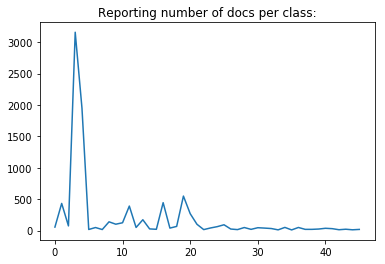

In [114]:
plot_("Reporting number of docs per class:", x_axis, docs_per_class_yAxis)

Reporting number of words per doc:

In [115]:
words_per_doc = list(df['doc'])

Let's create a graph:

x-axis is the docs

y-axis is the number of words per doc


In [116]:
x_axis_doc = range(len(words_per_doc))

In [117]:
y_axis_doc = words_per_doc

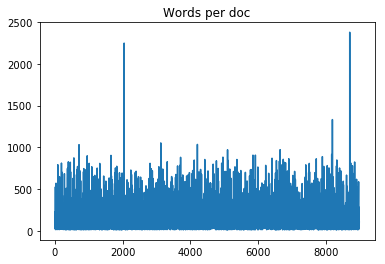

In [118]:
plot_("Words per doc", x_axis_doc, y_axis_doc)

We want to zoom in to the graph, let's look at the first 300 docs:

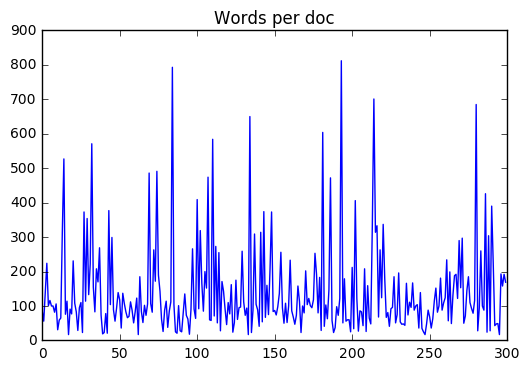

In [92]:
plot_("Words per doc", range(300), y_axis_doc[:300])